# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Importing all the necessary packages

# <font color = brown> Step1: Importing, Reading and Understanding the dataset

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
pd.set_option('display.max_columns',False)

In [3]:
# Reading the dataframe
leads_df = pd.read_csv('Leads.csv')
leads_df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#checking rows and cols in dataset
leads_df.shape

(9240, 37)

This dataset has:
- 9240 rows,
- 37 columns

In [5]:
# Checking the info of dataset
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Geting the summary of numeric variables in dataset
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# <font color = brown> Step2: DATA Cleaning

In [7]:
# Getting the head of data
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


###### <font color = black>UDF for calculating percentage as we will need it again and again

In [8]:
# Creating function for null percentage
def percent_null(x):
    return round(100*(x.isnull().sum()/len(x.index)),2).sort_values(ascending = False)

In [9]:
# Checking whether if there are any missing values in the data.
percent_null(leads_df)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [10]:
# Removing features which contain more than 40% of Missing Values
cols=leads_df.columns[round((leads_df.isnull().sum()/len(leads_df))*100)>=40]
leads_df=leads_df.drop(cols,1)

In [11]:
# Rechecking whether if there is any missing value.
percent_null(leads_df)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Prospect ID                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free cop

In [12]:
# Checking all the features and understanding them, data types, categories etc..
for column in leads_df:
    print(leads_df[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

### Dropping features which have only one value 'No' in all the rows or has single value that has more the 98% occurrence.


In [13]:
# Dropping features which has imbalanced data
leads_df.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [14]:
# Rechecking the null percentage
percent_null(leads_df)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
A free copy of Mastering The Interview            0.00
Prospect ID                                       0.00
Lead Number                                       0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Email                                      0.00
Lead Origi

### Handling the value 'Select' and 'Nan' in 'Specialization','How did you hear about X Education','Lead Profile' and 'City' features. 
##### Since this value is significant, imputing that with mode might skew the data. Hence assigning 'Not Selected' to both 'Select' and 'NaN' values

In [15]:
# Replacing 'NaN' and 'Select' with 'Not Selected'
for column in leads_df:
    if 'Select'  in leads_df[column].unique():
        leads_df[column] = leads_df[column].apply(lambda x :'Not Selected' if x == 'Select' else x)
        leads_df[column].fillna('Not Selected',inplace=True)

In [16]:
#checking if the Select and Nan replacement is done properly
for column in leads_df[['Specialization','How did you hear about X Education', 'Lead Profile','City']]:
    print(leads_df[column].astype('category').value_counts())
    print('___________________________________________________')

Not Selected                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64
___________________________________________________
Not Selected             7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool    

### We can see here 'Non selected' count is very high in 'How did you hear about X Education', 'Lead Profile','City'

In [17]:
# Checking the value count of 'Country'
leads_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [18]:
# Checking the percentage of 'Country' categories
round(100*(leads_df['Country'].value_counts()/len(leads_df)))

India                   70.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Netherlands              0.0
Ghana                    0.0
Philippines              0.0
Russia                   0.0
Switzerland              0.0
Vietnam                  0.0
Denmark                  0.0
Tanzania                 0.0
Liberia                  0.0
Malaysia      

### Since more than 70% of the data belongs to India, we are dropping this Country feature as well

In [19]:
# Droppiong the feature "Country"
leads_df.drop('Country', axis = 1, inplace = True)

### Tags: Since Tags variable is something which Sales team has added as the current status of the lead, we can drop it
### What matters most to you in choosing a course : We are dropping this feature and only 'Better Career Prospects' is a meaningful value. There are no other meaningful values in the feature
### Last Notable Activity: We can drop this feature as it has same meaning as the 'Last Activity' feature as mentioned in the data dictionary
### Lead Profile: We can drop this feature, as count of Select is around 45% and missing value is close to 30% which brings it to a total of 75% not so useful data for building the model and further analysis
### How did you hear about X Education: We can drop this feature, as count of Select is around 55% and the missing value is close to 24% which brings to 79% of not so useful data

In [20]:
# Dropping the features 'Tags','Last Notable Activity','What matters most to you in choosing a course','Lead Profile','How did you hear about X Education'
leads_df.drop(['Tags','Last Notable Activity','What matters most to you in choosing a course','Lead Profile','How did you hear about X Education'], axis = 1, inplace = True)

In [21]:
# Checking the value count of 'City' feature
leads_df.City.value_counts()

Not Selected                   3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [22]:
# Checking the percentages for features in 'City'
round(100*(leads_df['City'].value_counts()/len(leads_df)))

Not Selected                   40.0
Mumbai                         35.0
Thane & Outskirts               8.0
Other Cities                    7.0
Other Cities of Maharashtra     5.0
Other Metro Cities              4.0
Tier II Cities                  1.0
Name: City, dtype: float64

### City: We can drop this feature as 40% is Not Selected (means missing data) plus 35% is Mumbai.. that adds to 75% data of same value, which will not yield any different result


In [23]:
# Dropping the feature 'City'
leads_df.drop('City',axis=1, inplace=True)

In [24]:
# Rechecking the null percentage
percent_null(leads_df)

What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
Specialization                             0.00
A free copy of Mastering The Interview     0.00
dtype: float64

In [25]:
# Checking the value count of "What is your current occupation" feature
leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
# Imputing  "Other" for missing value in What is your current occupation feature, so that we do not Imbalance the data
leads_df['What is your current occupation']=leads_df['What is your current occupation'].replace(np.nan,'Other')
leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
# Finding the Labels contains in the "Last Activity Variable
leads_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [28]:
# Imputing "Email Opened" as its mode value in Last Activity feature
leads_df['Last Activity'].fillna(leads_df['Last Activity'].mode()[0],inplace=True)
leads_df['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [29]:
# checking the value counts of Lead Source feature

leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [30]:
# Imputing missing value with mode value 'i.e. 'Google' for Lead Source feature
leads_df['Lead Source'].fillna(leads_df['Lead Source'].mode()[0],inplace=True)

In [31]:
# Rechecking the null percentage
percent_null(leads_df)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
dtype: float64

### Converting long tail of  'Last Activity', and 'Lead Source' Features into others

In [32]:
# Changing categories which are occured less than 10 with 'Other'
col_dict_la=dict(leads_df['Last Activity'].value_counts()<10)

for i in col_dict_la.keys():
    if col_dict_la[i]==True:
        leads_df['Last Activity']=leads_df['Last Activity'].replace(i,'Other')

In [33]:
# checking the value counts of 'Last Activity' feature
leads_df['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Other                          21
Name: Last Activity, dtype: int64

In [34]:
# checking the value counts of 'Lead Source' feature
leads_df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [35]:
# here we have found that 'google' and 'Google' is same just a typo hence we replaced it 'google' to 'Google'.
leads_df['Lead Source']=leads_df['Lead Source'].replace('google','Google')

In [36]:
#Recoding all the categories which has < 55 frequency into Others
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['Facebook','bing','Click2call','Social Media','Live Chat','Press_Release','Pay per Click Ads','blog',
                                                     'WeLearn','youtubechannel','welearnblog_Home',
                                                    'testone','NC_EDM'] ,'Others')
# checking the value counts of 'Lead Source' feature
leads_df['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                78
Name: Lead Source, dtype: int64

### Identifying features which has yes and no and converting them into 1 and 0 respectively

In [37]:
## identifying features that have 'Yes' or 'No' values

bin_columns = []

for columns in leads_df.columns:
    if leads_df[columns].unique().any() in ['Yes','No']:
        bin_columns.append(columns)
        
for columns in bin_columns:
    print(columns,' \n****************\n',leads_df[columns].value_counts(),"\n")

Do Not Email  
****************
 No     8506
Yes     734
Name: Do Not Email, dtype: int64 

A free copy of Mastering The Interview  
****************
 No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64 



In [38]:
# Creating function for binary mapping
def binary_mapping(x):
    return x.map({'Yes':1,'No':0})
    
leads_df[bin_columns] = leads_df[bin_columns].apply(binary_mapping)

In [39]:
# Rechecking the null percentage
percent_null(leads_df)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
dtype: float64

In [40]:
# Checking the missing records for 'TotalVisits' 
leads_df['TotalVisits'].isnull().sum()

137

In [41]:
# Checking the missing records for 'Page Views Per Visit' 
leads_df['Page Views Per Visit'].isnull().sum()

137

### Dropping the missing rows for TotalVisits feature as the count is  1.48%

In [42]:
# Dropping rows for 'TotalVisits' feature
leads_df = leads_df[~pd.isnull(leads_df['TotalVisits'])]

In [43]:
# Rechecking the null percentage
percent_null(leads_df)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64

### We can see here the null percentage for 'Page Views Per Visit' feature is '0'
### This is due to the number of rows which we have dropped for 'TotalVisits' feature are same 

### All the missing values have been taken care of and now we will proceed with futher steps of EDA

In [44]:
#checkiong final number of rows and columns present in the dataset
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   int64  
 5   Converted                               9103 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9103 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9103 non-null   object 
 10  Specialization                          9103 non-null   obje

### Outlier Detection

In [45]:
# Checking the difference between 99 percentile and maximum value
numeric = leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
99%,17.000000,1838.960000,9.000000
max,251.000000,2272.000000,55.000000


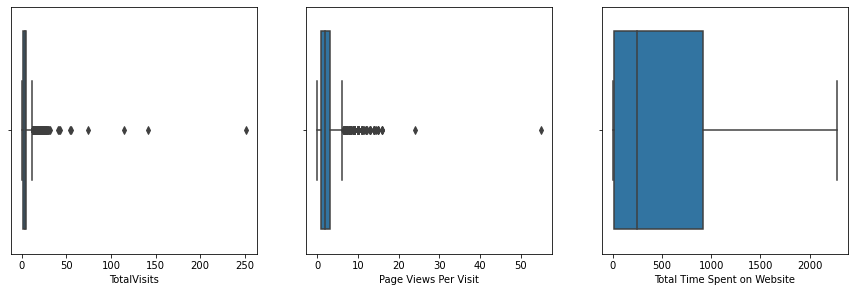

In [46]:
# Finding the outliers
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.boxplot(leads_df['TotalVisits'])
plt.subplot(2,3,2)
sns.boxplot(leads_df['Page Views Per Visit'])
plt.subplot(2,3,3)
sns.boxplot(leads_df['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.show()


##### - Outliers are Present in both the features 'TotalVisits' and 'Page Views Per Visit' 
##### - It depends on the individuals to do a number of views and Page Views and hence retaining the data as it is and not doing any outlier treatment to it

In [47]:
# making lead number as index
leads_df=leads_df.set_index('Lead Number')
leads_df.drop(['Prospect ID'],1,inplace=True)

# <font color = brown> Step3: Exploratory Data Analysis

### Univariate analysis

In [48]:
percent_null(leads_df)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64

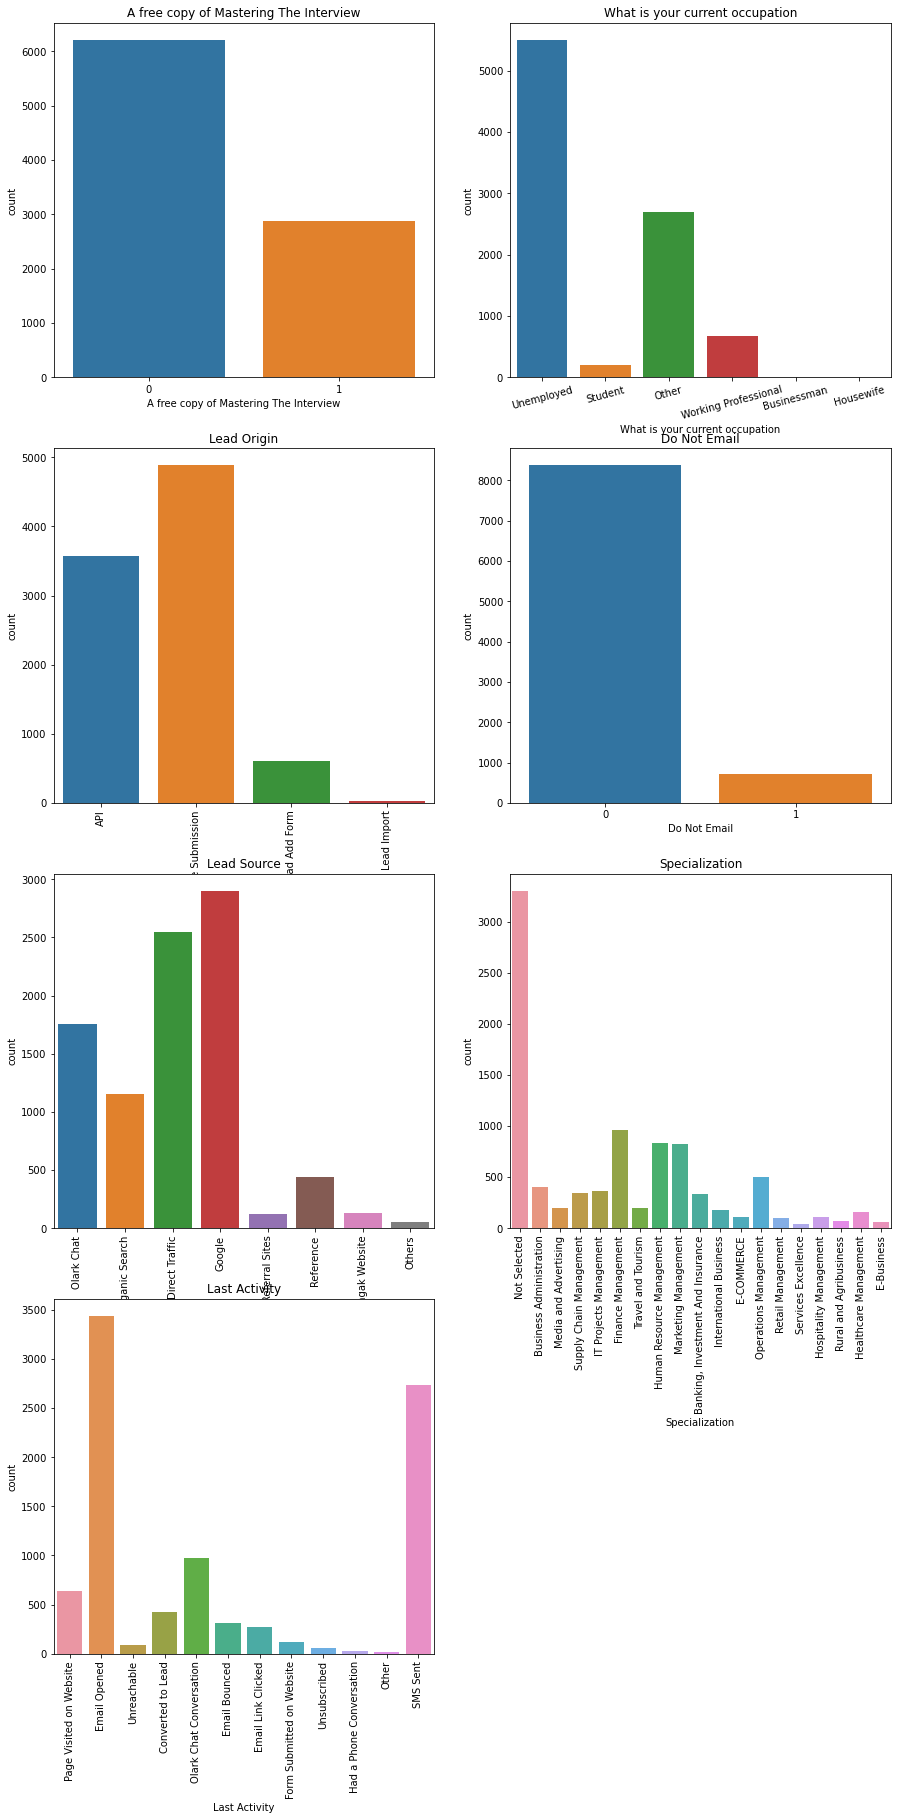

In [49]:
# Plotting graphs of categorical features
plt.figure(figsize = (15,30))

plt.subplot(4,2,1)
sns.countplot(leads_df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(4,2,2)
sns.countplot(leads_df['What is your current occupation']).tick_params(axis='x', rotation = 15)
plt.title('What is your current occupation')

plt.subplot(4,2,3)
sns.countplot(leads_df['Lead Origin']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(4,2,4)
sns.countplot(leads_df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(4,2,5)
sns.countplot(leads_df['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(4,2,6)
sns.countplot(leads_df['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(4,2,7)
sns.countplot(leads_df['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.show()

### Observations as per the graphs:
    - Less than 33% customers are opting for “A free copy of Mastering The Interview”
    - Unemployed seems to be around 60% of the population and along with Other they constitute with more than 85% of the population
    - Email Opened and SMS Sent are constituting to 66% of the population
    - More than 90% lead are originated through “API” or “Landing Page Submission”
    - Google and Direct Traffic constitutes to around 57% of the population of the Lead Source
    - 37% of the leads have not selected any specialization and a lot of people are opting for different types of management courses


### Bivariate analysis

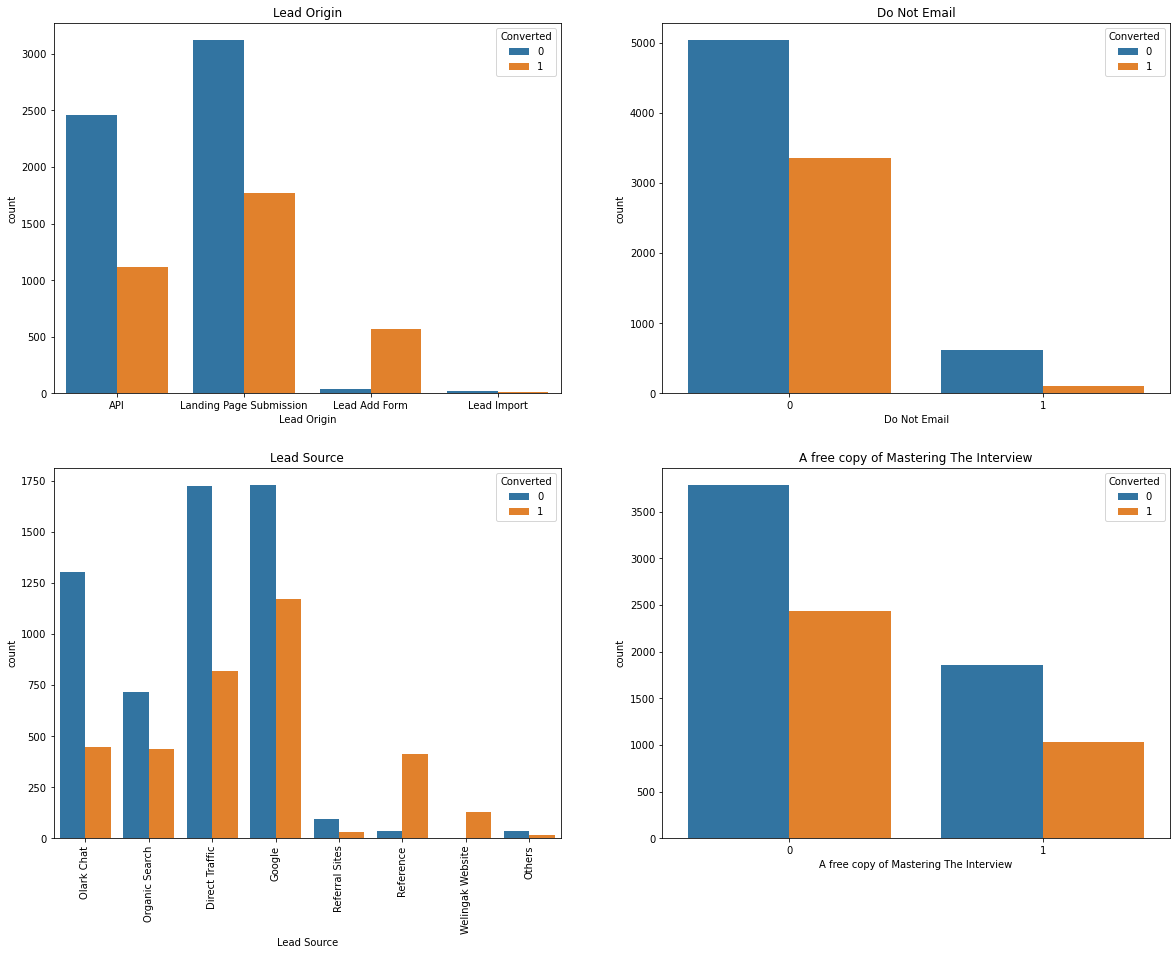

In [50]:
# Plotting the graphs against target variable
plt.figure(figsize = (20,15))

plt.subplot(2,2,1)
sns.countplot(leads_df['Lead Origin'],hue=leads_df.Converted)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(leads_df['Do Not Email'],hue=leads_df.Converted)
plt.title('Do Not Email')

plt.subplot(2,2,3)
sns.countplot(leads_df['Lead Source'],hue=leads_df.Converted).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(2,2,4)
sns.countplot(leads_df['A free copy of Mastering The Interview'],hue=leads_df.Converted)
plt.title('A free copy of Mastering The Interview')

plt.show()


### Observations as per the graphs:
    - API and Landing Page Submission bring higher number of leads as well as conversion.
    - In order to improve overall lead conversion rate, we have to improve lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form.
    - There is no impact of giving "A free copy of Mastering The interview" on lead generation..
    - Maximum # of leads are generated by Google and Direct Traffic channels.
    - Reference seems to be having very high conversion rate. Same is the case with Welinkar Website
    - To improve the lead conversion rate we can focus on Google and Direct Traffic channels, we can also look at investing in Olark_Chat and Organic Search to improve the rate further


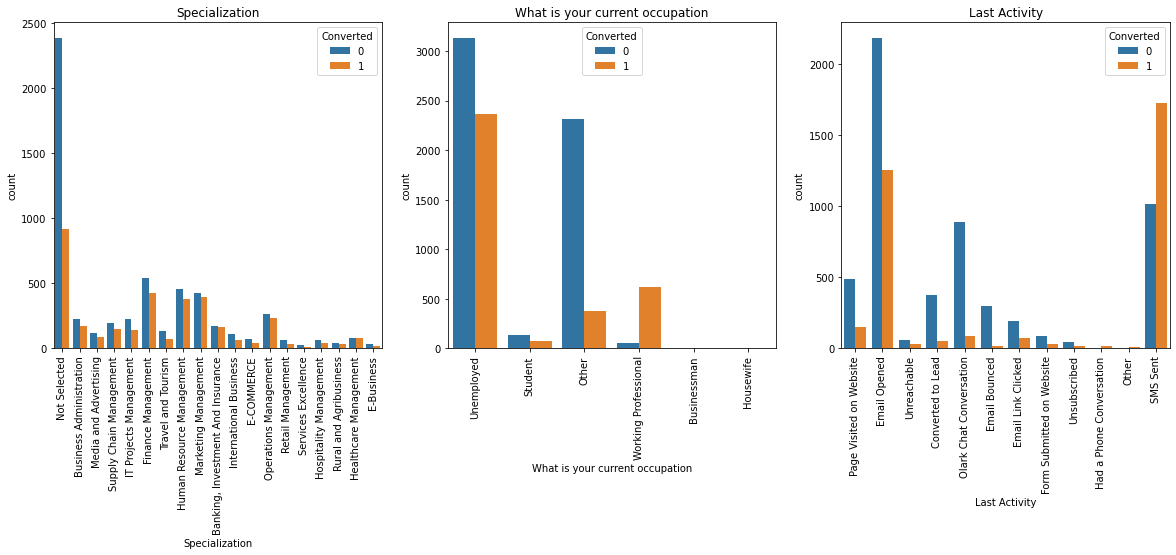

In [51]:
# Plotting the graphs
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.countplot(leads_df['Specialization'],hue=leads_df.Converted).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(1,3,2)
sns.countplot(leads_df['What is your current occupation'],hue=leads_df.Converted).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.subplot(1,3,3)
sns.countplot(leads_df['Last Activity'],hue=leads_df.Converted).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()


### Observations as per the graphs:
    - Lead conversion is far better for Working Professionals who are either looking to upskill or change their field
    - Unemployed leads are the most in terms of Absolute numbers and can be tapped with better marketing offers to improve the conversion rate
    - Leads which are looking for Human Resource, Marketing and Operations Management course have much better conversion rate.. which means that the X Education is well know for these streams
    - Lead conversion for Finance Management stream is very less compared to other streams and X Education needs to work towards that
    - Emailed Opened and SMS sent has higher leads and higher conversion rate. More focus should be on these 2 categories


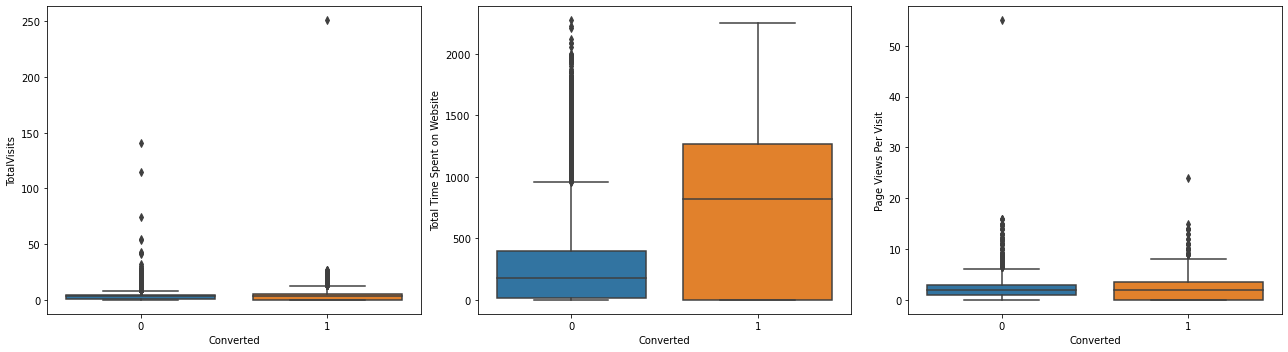

In [52]:
# Boxplot for 'TotalVisits' 'Total Time Spent on Website' and 'Page Views Per Visit'

fig=plt.subplots(figsize=(18, 5))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website","Page Views Per Visit"]):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = leads_df)
    plt.tight_layout()


### Observations as per the graphs:
- The median of both the conversion and non-conversion are same and hence nothing conclusive can be said using this information.
- Users spending more time on the website are more likely to get converted.
- Websites can be made more appealing so as to increase the time of the Users on websites

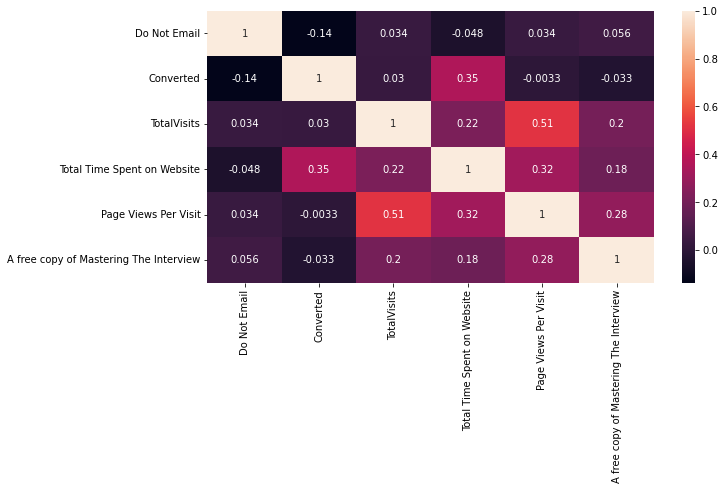

In [53]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(leads_df.corr(), annot = True)
plt.show()


### Observations as per the graphs:
   - There is some correlation between Conversion and Total Time spent on the website.. albiet it is not so strong
   - There is decent correlation between TotalVisits and Page Views per visit and hence we need to keep this in mind while building the model
  

# <font color = brown> Step4: Creating dummy variables

In [54]:
# Getting features which are 'object'
temp = leads_df.loc[:, leads_df.dtypes == 'object']
temp.columns


Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation'],
      dtype='object')

In [55]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation'
       ]], drop_first=True)

# Add the results to the master dataframe
leads_df = pd.concat([leads_df, dummy], axis=1)

In [56]:
# Drop the variables for which the dummy variables have been created

leads_df = leads_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation'], 1)

In [57]:
# looking at the dataframe
leads_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
660728,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
660681,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [58]:
# Checking the info of data
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 660737 to 579533
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9103 non-null   int64  
 1   Converted                                             9103 non-null   int64  
 2   TotalVisits                                           9103 non-null   float64
 3   Total Time Spent on Website                           9103 non-null   int64  
 4   Page Views Per Visit                                  9103 non-null   float64
 5   A free copy of Mastering The Interview                9103 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9103 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9103 non-null   uint8  
 8   Lead Origin_Lead Import                            

# <font color = brown> Step5: Test-Train Split

In [59]:
# Split the dataset into 70% train and 30% test

train_df, test_df = train_test_split(leads_df, train_size=0.7, random_state=100)

In [60]:
## X_train and y_train

X_train = train_df.drop('Converted',axis=1)
y_train = train_df['Converted']


In [61]:
## X_test and y_test

X_test = test_df.drop('Converted',axis=1)
y_test = test_df['Converted']

In [62]:
# Looking at the dataframe
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
588794,0,3.0,1286,1.5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
607556,0,7.0,60,7.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
640629,0,5.0,169,2.5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
643916,0,14.0,1241,3.5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
580141,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


#### Scaling

In [63]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [64]:
# Scaling the numerical features
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
588794,0,0.011952,0.570794,0.027273,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
607556,0,0.027888,0.026631,0.127273,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
640629,0,0.019920,0.075011,0.045455,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
643916,0,0.055777,0.550821,0.063636,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
580141,0,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


#### Let's see the correlation matrix 

#### Since there are a lot of variables it is difficult to drop variable. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

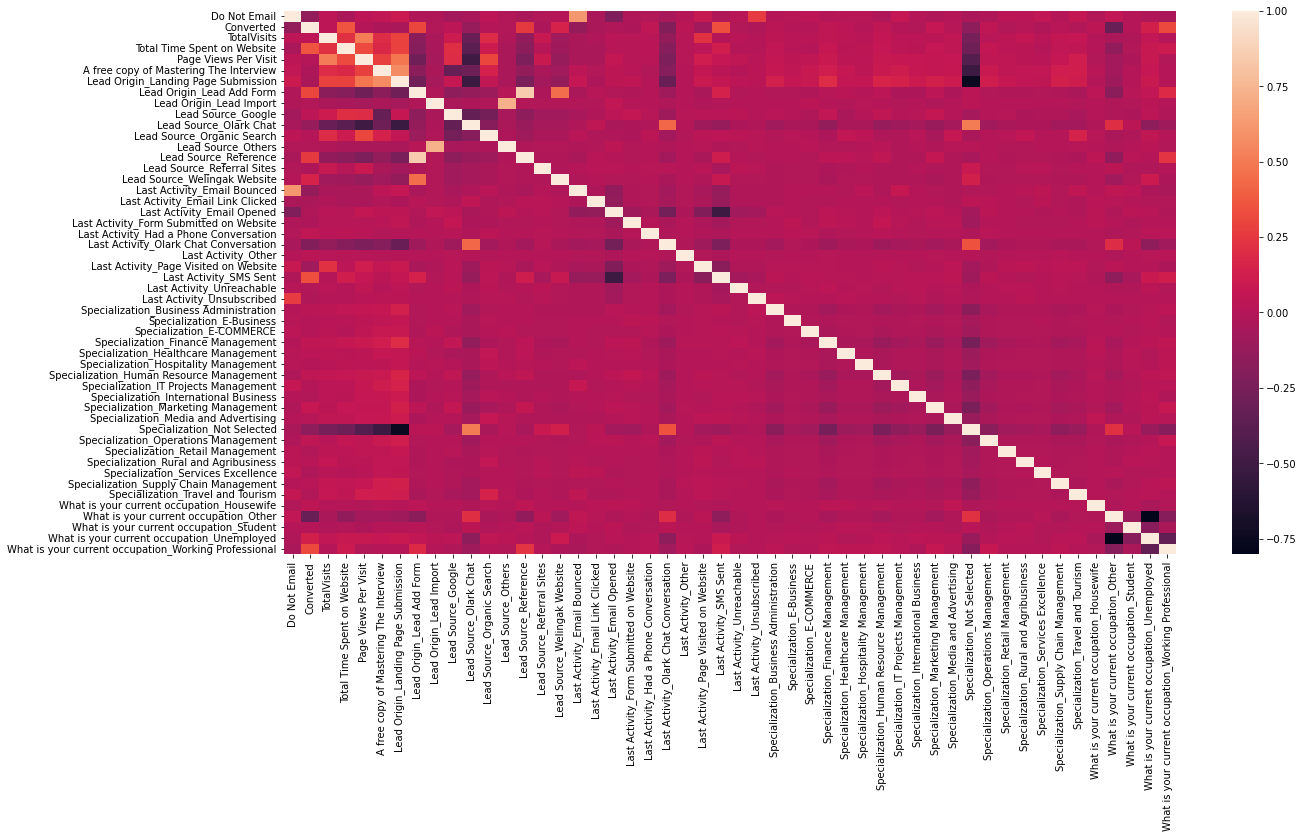

In [65]:
# Creating heatmap to understand the correlation between features
plt.figure(figsize = (20,10))
sns.heatmap(leads_df.corr())
plt.show()

In [66]:
# Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap.

leads_df.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
Do Not Email,1.000000,-0.136553,0.033842,-0.047943,0.033582,0.056098,0.096400,-0.021721,-0.017183,-0.066919,-0.051918,0.034433,-0.006846,-0.036293,-0.010263,0.002542,0.616344,-0.043879,-0.221404,-0.018917,-0.007668,-0.055620,0.006093,0.082735,-0.017498,0.007558,0.264492,0.004494,0.012695,0.030230,-0.005959,0.014074,0.011733,-0.019169,0.070045,0.002954,-0.026229,-0.000182,-0.038655,-0.013841,0.023552,0.028196,0.054132,0.003145,0.060457,-0.009247,0.050159,0.006908,-0.022084,-0.047911
Converted,-0.136553,1.000000,0.030395,0.354939,-0.003328,-0.033079,-0.040698,0.306224,-0.010824,0.033821,-0.125395,-0.001874,-0.007459,0.254067,-0.032135,0.149250,-0.127649,-0.038243,-0.025097,-0.032491,0.045382,-0.209246,0.023778,-0.081726,0.338020,-0.011936,-0.019950,0.025754,-0.001927,-0.006604,0.043609,0.030085,0.005768,0.048835,0.000974,-0.008079,0.066812,0.011059,-0.158220,0.044595,-0.008729,0.008234,-0.014398,0.019467,-0.008912,0.040166,-0.320517,-0.005620,0.128250,0.315113
TotalVisits,0.033842,0.030395,1.000000,0.221240,0.512125,0.202273,0.291913,-0.173909,-0.038378,0.103621,-0.311123,0.194257,-0.027713,-0.146946,0.081541,-0.079727,-0.046756,-0.022112,0.021272,0.012378,0.018536,-0.139568,0.011757,0.225087,-0.005036,0.016451,0.003007,0.041821,0.016817,0.023418,0.048116,0.035823,0.018057,0.063313,0.030761,0.035273,0.023749,0.044253,-0.254597,0.020994,0.037444,0.058227,0.016145,0.063306,0.064377,-0.006485,-0.047880,-0.023857,0.054206,-0.004592
Total Time Spent on Website,-0.047943,0.354939,0.221240,1.000000,0.320361,0.179005,0.294515,-0.194106,-0.051363,0.210321,-0.376633,0.101911,-0.039651,-0.162064,0.012850,-0.091594,-0.036669,-0.039876,0.009727,0.009570,0.027180,-0.190181,0.007512,0.031634,0.127009,0.002334,-0.003064,0.055889,0.020160,-0.000699,0.074670,0.028396,0.037114,0.067593,0.035296,0.023475,0.068576,0.043585,-0.297863,0.062277,0.029044,0.021989,0.003712,0.051439,0.043746,0.006983,-0.142429,-0.012600,0.083707,0.096616
Page Views Per Visit,0.033582,-0.003328,0.512125,0.320361,1.000000,0.277263,0.485950,-0.274411,-0.056927,0.199736,-0.500880,0.305074,-0.038616,-0.231325,0.085105,-0.124946,-0.036905,-0.037866,0.058170,0.011434,0.014723,-0.226734,0.010504,0.115451,0.066421,0.044004,0.019698,0.056909,0.036296,0.047538,0.089817,0.039216,0.033385,0.082672,0.075065,0.069822,0.056897,0.066379,-0.405147,0.049436,0.045983,0.025926,0.021246,0.065544,0.113662,-0.007707,-0.072659,-0.032147,0.081458,-0.008064
A free

In [67]:
# Importing LogisticRegression from linear_model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [68]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [69]:
# Looking at RFE ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('A free copy of Mastering The Interview', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Others', False, 16),
 ('Lead Source_Reference', False, 14),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 30),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Form Submitted on Website', False, 31),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', False, 11),
 ('

In [70]:
# After used RFE here RFE selected these variables should be used for modeling
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [71]:
# After used RFE here RFE selected these variables should not be used for modeling
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_Not Selected',
  

In [72]:
# Selecting the features which were selected by RFE

X_train = X_train[col]
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,
588794,0,0.011952,0.570794,1,0,0,0,0,0,0,1,0,0,0,0
607556,0,0.027888,0.026631,1,0,0,0,0,0,0,0,0,0,0,0
640629,0,0.019920,0.075011,1,0,0,0,0,0,0,1,0,0,0,0
643916,0,0.055777,0.550821,1,0,0,0,0,0,0,0,0,0,0,1
580141,0,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,0


# <font color = brown> Step6: Building the Model

### <font color = brown> Model 1

In [73]:
# BUILDING MODEL #1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2616.3
Date:                Fri, 30 Dec 2022   Deviance:                       5232.6
Time:                        00:35:33   Pearson chi2:                 6.33e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0833      0.102    -20.383      0.000      -2.284      -1.883
Do Not Email                                            -1.6076      0.176     -9.121      0.000      -1.953      -1.262
TotalVisits                                              9.1910      2.217      4.145      0.000       4.845      13.537
Total Time Spent on Website                              4.5179      0.165     27.380      0.000       4.194       4.841
Lead Origin_Landing Page Submission                     -0.3115      0.088     -3.522      0.000      -0.485      -0.138
Lead Origin_Lead Add Form                                3.6614      0.234     15.678      0.000       3.204       4.119
Lead Source_Olark Chat                                   1.2539      0.125     10.042      0.000       1.009       1.499
Lead Source_Welingak Website                             1.8453      0.753      2.450      0.014       0.369       3.321
Last Activity_Had a Phone Conversation                   1.7202      0.644      2.670      0.008       0.457       2.983
Last Activity_Olark Chat Conversation                   -1.3178      0.165     -7.998      0.000      -1.641      -0.995
Last Activity_Other                                      1.0792      0.616      1.752      0.080      -0.128       2.287
Last Activity_SMS Sent                                   1.3406      0.075     17.893      0.000       1.194       1.487
Last Activity_Unsubscribed                               1.2565      0.472      2.663      0.008       0.332       2.181
What is your current occupation_Housewife               23.1745    1.6e+04      0.001      0.999   -3.13e+04    3.13e+04
What is your current occupation_Other                   -1.2084      0.087    -13.872      0.000      -1.379      -1.038
What is your current occupation_Working Professional     2.5235      0.184     13.686      0.000       2.162       2.885
========================================================================================================================
"""

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,2.28
2,Total Time Spent on Website,1.91
1,TotalVisits,1.58
5,Lead Source_Olark Chat,1.56
10,Last Activity_SMS Sent,1.51
4,Lead Origin_Lead Add Form,1.46
13,What is your current occupation_Other,1.46
8,Last Activity_Olark Chat Conversation,1.41
6,Lead Source_Welingak Website,1.32
0,Do Not Email,1.18


### P value of 'What is your current occupation_Housewife' high , so we are dropping it

In [75]:
# What is your current occupation_Housewife

col = col.drop('What is your current occupation_Housewife',1)

### <font color = brown> Model 2

In [76]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.8
Date:                Fri, 30 Dec 2022   Deviance:                       5245.7
Time:                        00:35:33   Pearson chi2:                 6.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0751      0.102    -20.338      0.000      -2.275      -1.875
Do Not Email                                            -1.6109      0.176     -9.146      0.000      -1.956      -1.266
TotalVisits                                              9.0632      2.211      4.099      0.000       4.729      13.397
Total Time Spent on Website                              4.5166      0.165     27.405      0.000       4.194       4.840
Lead Origin_Landing Page Submission                     -0.3054      0.088     -3.458      0.001      -0.479      -0.132
Lead Origin_Lead Add Form                                3.6640      0.233     15.700      0.000       3.207       4.121
Lead Source_Olark Chat                                   1.2507      0.125     10.024      0.000       1.006       1.495
Lead Source_Welingak Website                             1.8391      0.753      2.442      0.015       0.363       3.315
Last Activity_Had a Phone Conversation                   1.7110      0.644      2.656      0.008       0.448       2.974
Last Activity_Olark Chat Conversation                   -1.3217      0.165     -8.023      0.000      -1.645      -0.999
Last Activity_Other                                      1.0735      0.616      1.742      0.081      -0.134       2.281
Last Activity_SMS Sent                                   1.3326      0.075     17.807      0.000       1.186       1.479
Last Activity_Unsubscribed                               1.2517      0.472      2.653      0.008       0.327       2.176
What is your current occupation_Other                   -1.2133      0.087    -13.936      0.000      -1.384      -1.043
What is your current occupation_Working Professional     2.5160      0.184     13.651      0.000       2.155       2.877
========================================================================================================================
"""

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,2.28
2,Total Time Spent on Website,1.91
1,TotalVisits,1.58
5,Lead Source_Olark Chat,1.56
10,Last Activity_SMS Sent,1.51
4,Lead Origin_Lead Add Form,1.46
12,What is your current occupation_Other,1.46
8,Last Activity_Olark Chat Conversation,1.41
6,Lead Source_Welingak Website,1.32
0,Do Not Email,1.18


### We will drop Last Activity_Other as the P-Value is very high

In [78]:
#dropping feature with high P value 'Last Activity_Other'

col = col.drop('Last Activity_Other',1)

### <font color = brown> Model 3

In [79]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.4
Date:                Fri, 30 Dec 2022   Deviance:                       5248.8
Time:                        00:35:34   Pearson chi2:                 6.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0715      0.102    -20.308      0.000      -2.271      -1.872
Do Not Email                                            -1.6069      0.176     -9.146      0.000      -1.951      -1.263
TotalVisits                                              9.1220      2.212      4.124      0.000       4.787      13.457
Total Time Spent on Website                              4.5188      0.165     27.424      0.000       4.196       4.842
Lead Origin_Landing Page Submission                     -0.3055      0.088     -3.458      0.001      -0.479      -0.132
Lead Origin_Lead Add Form                                3.6615      0.233     15.690      0.000       3.204       4.119
Lead Source_Olark Chat                                   1.2565      0.125     10.071      0.000       1.012       1.501
Lead Source_Welingak Website                             1.8397      0.753      2.443      0.015       0.364       3.316
Last Activity_Had a Phone Conversation                   1.7057      0.644      2.647      0.008       0.443       2.969
Last Activity_Olark Chat Conversation                   -1.3292      0.165     -8.071      0.000      -1.652      -1.006
Last Activity_SMS Sent                                   1.3270      0.075     17.752      0.000       1.180       1.473
Last Activity_Unsubscribed                               1.2425      0.472      2.634      0.008       0.318       2.167
What is your current occupation_Other                   -1.2159      0.087    -13.968      0.000      -1.386      -1.045
What is your current occupation_Working Professional     2.5230      0.184     13.690      0.000       2.162       2.884
========================================================================================================================
"""

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,2.27
2,Total Time Spent on Website,1.91
1,TotalVisits,1.58
5,Lead Source_Olark Chat,1.55
9,Last Activity_SMS Sent,1.51
4,Lead Origin_Lead Add Form,1.46
11,What is your current occupation_Other,1.46
8,Last Activity_Olark Chat Conversation,1.41
6,Lead Source_Welingak Website,1.32
0,Do Not Email,1.18


### P value and VIF for all features seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

# <font color = brown> Step7: Training the data

In [81]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
588794    0.837308
607556    0.118969
640629    0.370675
643916    0.958666
580141    0.306817
610971    0.115994
581700    0.467937
657139    0.158722
607568    0.330939
649003    0.470009
dtype: float64

In [82]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.83730781, 0.11896876, 0.37067522, 0.95866614, 0.30681681,
       0.11599448, 0.46793733, 0.15872229, 0.33093865, 0.47000934])

In [83]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.837308
1,0,0.118969
2,0,0.370675
3,1,0.958666
4,0,0.306817


In [84]:
# Creating new feature 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

,Converted,Conversion_Prob,Predicted
0,0,0.837308,1
1,0,0.118969,0
2,0,0.370675,0
3,1,0.958666,1
4,0,0.306817,0
5,0,0.115994,0
6,0,0.467937,0
7,1,0.158722,0
8,1,0.330939,0
9,1,0.470009,0



# <font color = brown> Step8: Model Evaluation

In [85]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [86]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3511,  442],
       [ 745, 1674]], dtype=int64)

In [87]:
# Check the overall accuracy of the train data
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),2)

0.81

<font color= black>___81% accuracy is a very good value___</font>

In [88]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [89]:
# Calculating the sensitivity of the train data
round(TP/(TP+FN),2)

0.69

In [90]:
# Calculating the specificity of the train data
round(TN/(TN+FP),2)

0.89

### <font color= black> With 0.5 as a cut-off we have 81% accuracy,  69% sensitivity and 89% specificity </font>

# <font color = brown> Step9: Optimise Cut off (ROC Curve)

### Finding the Optimal Cutoff

###### Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, we need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [91]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
# Creating metrics for ROC curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False) 

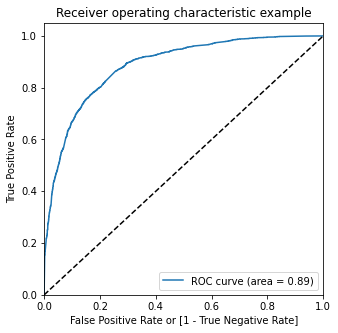

In [93]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

##### The area under the curve of the ROC is 0.89 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [94]:
# Creating features with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.837308,1,1,1,1,1,1,1,1,1,1,0
1,0,0.118969,0,1,1,0,0,0,0,0,0,0,0
2,0,0.370675,0,1,1,1,1,0,0,0,0,0,0
3,1,0.958666,1,1,1,1,1,1,1,1,1,1,1
4,0,0.306817,0,1,1,1,1,0,0,0,0,0,0


In [95]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.379630,1.000000,0.000000
0.1,0.1,0.580665,0.980984,0.335694
0.2,0.2,0.757847,0.911947,0.663547
0.3,0.3,0.787508,0.866887,0.738932
0.4,0.4,0.811990,0.763125,0.841892
0.5,0.5,0.813716,0.692021,0.888186
0.6,0.6,0.806654,0.627119,0.916519
0.7,0.7,0.780760,0.509715,0.946623
0.8,0.8,0.758161,0.413807,0.968884
0.9,0.9,0.710452,0.258371,0.987098


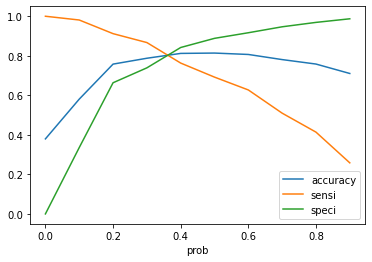

In [96]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color= black>___From the graph it is visible that the optimal cut off is at 0.36 where we get the optimal values of the three metrics. So let's choose 0.36 as our cutoff now.___</font>

In [97]:
# Creating features with optimal probability cutoff at 0.36
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.837308,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.118969,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.370675,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.958666,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.306817,0,1,1,1,1,0,0,0,0,0,0,0


In [98]:
# Check the overall accuracy
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)

0.81

In [99]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3231,  722],
       [ 517, 1902]], dtype=int64)

In [100]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [101]:
# Calculating the sensitivity of the model
round(TP/float(TP + FN),2)

0.79

In [102]:
# Calculating the specificity of the model
round(TN/float(TN + FP),2)

0.82

<font color= black> <b>With the cut off as 0.36 we have the final model with 81% accuracy, 79% sensitivity and 82% specificity

In [103]:
# Calculate false postive rate of the model - predicting conversion when customer does not have converted
round(FP/ float(TN + FP),2)

0.18

<font color= black> <b> False positive rate should be low and in our case it is 18% which indicates good model 

In [104]:
# Positive predictive value of the model
round(TP / float(TP + FN),2)

0.79

In [105]:
# Negative predictive value of the model
round(TN / float(TN + FP),2)

0.82

<font color= black> <b> This model has 79% positive predictive value and 82% negative predictive value which suggest this model is good 

### Calculating the Precision and Recall

In [106]:
# Calculating precision
final_precision = metrics.precision_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
round(final_precision,2)

0.72

In [107]:
# Calculating recall
final_recall = metrics.recall_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
round(final_recall,2)

0.79

### Precision of the model is 72% and Recall is 79%

### Precision and recall tradeoff

In [108]:
# Getting p, r and threshold values
p,r,thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob)

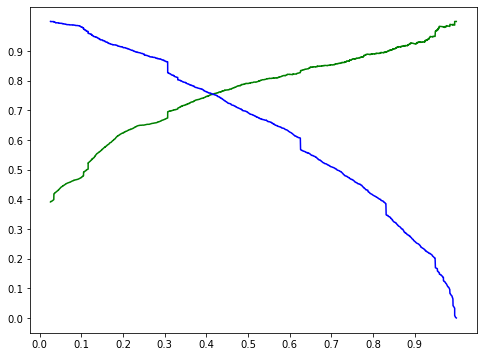

In [109]:
# Plotting precision recall curve
plt.figure(figsize=(8,6))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "b-")
plt.xticks(ticks = [x/10 for x in range(10)])
plt.yticks(ticks = [x/10 for x in range(10)])
plt.show()

# <font color = brown> Step10: Prediction on Test Data set

In [110]:
# Let's now make predicitons on the test set.
# Scale the test set as well using just 'transform'

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [111]:
# Select the features in X_train for X_test as well

X_test = X_test[col]
X_test.shape

(2731, 13)

In [112]:
# Looking at X_test dataframe
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Other,What is your current occupation_Working Professional
Lead Number,,,,,,,,,,,,,
626930,0,0.011952,0.188194,1,0,0,0,0,0,0,0,0,0
621198,0,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0
594161,1,0.007968,0.316023,1,0,0,0,0,0,1,0,0,0
647285,0,0.015936,0.187750,1,0,0,0,0,0,0,0,0,0
587146,0,0.027888,0.109632,1,0,0,0,0,0,0,0,0,0


In [113]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))


In [114]:
y_test_pred

Lead Number
626930    0.195048
621198    0.948678
594161    0.239364
647285    0.200495
587146    0.164218
            ...   
599958    0.319471
657077    0.218786
624090    0.037655
588144    0.949030
605206    0.889408
Length: 2731, dtype: float64

In [115]:
# Converting y_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = y_test_pred_df.rename(columns = {0:'Conversion_Probability'})
y_test_pred_df.head()

,Conversion_Probability
Lead Number,
626930,0.195048
621198,0.948678
594161,0.239364
647285,0.200495
587146,0.164218


In [116]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index
y_test_df

,Converted,Lead Number
Lead Number,,
626930,0,626930
621198,1,621198
594161,0,594161
647285,0,647285
587146,1,587146
...,...,...
599958,0,599958
657077,0,657077
624090,0,624090


In [117]:
# Remove index for both dataframes to append them side by side 

y_test_df.reset_index(drop=True,inplace=True)
y_test_pred_df.reset_index(drop=True,inplace=True)

In [118]:
# Append y_test_df and y_test_pred_df

y_test_final = pd.concat([y_test_df,y_test_pred_df],axis=1)
y_test_final.head()

,Converted,Lead Number,Conversion_Probability
0,0,626930,0.195048
1,1,621198,0.948678
2,0,594161,0.239364
3,0,647285,0.200495
4,1,587146,0.164218


In [119]:
# Rearranging the features
y_test_final = y_test_final.reindex(['Lead Number','Converted','Conversion_Probability'], axis=1)

In [120]:
# Make predictions on the test set using 0.35 as the cutoff

y_test_final['Final_Predicted'] = y_test_final['Conversion_Probability'].map(lambda x: 1 if x>0.36 else 0)
y_test_final['Lead_Score'] = y_test_final['Conversion_Probability'].map(lambda x: x*100)
y_test_final

,Lead Number,Converted,Conversion_Probability,Final_Predicted,Lead_Score
0,626930,0,0.195048,0,19.504790
1,621198,1,0.948678,1,94.867752
2,594161,0,0.239364,0,23.936442
3,647285,0,0.200495,0,20.049547
4,587146,1,0.164218,0,16.421827
...,...,...,...,...,...
2726,599958,0,0.319471,0,31.947120
2727,657077,0,0.218786,0,21.878578
2728,624090,0,0.037655,0,3.765549
2729,588144,1,0.949030,1,94.902979


In [121]:
# Let's check the overall accuracy of the test data set

round(metrics.accuracy_score(y_test_final.Converted,y_test_final.Final_Predicted),2)


0.8

In [122]:
# Creating confussion metrics
confusion_test = metrics.confusion_matrix(y_test_final.Converted,y_test_final.Final_Predicted )
confusion_test

array([[1364,  325],
       [ 213,  829]], dtype=int64)

In [123]:
TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [124]:
# Calculate sensitivity of the test data set

round(TP_test/(TP_test+FN_test),2)

0.8

In [125]:
# Calculate specificity of the test data set

round(TN_test/(TN_test+FP_test),2)

0.81

In [126]:
# Calculate Precision of the test data set

round(TP_test / (TP_test + FP_test),2)


0.72

In [127]:
# Calculate Recall  of the test data set

round(TP_test / (TP_test + FN_test),2)

0.8

     Parameter-----------Train data-----------Test data
     Accuracy--------------81%------------------80% 
     Sensitivity-----------79%------------------80% 
     Specificity-----------82%------------------81% 

#### Since the Accuracy, Sensitivity and Specificity of the train and test data set is almost the same.. The model is good to go


### <font color = black> <B>The final formula for this Log Reg model is –   
    

<font color = black> <I>

ln (p/(1-p)) = -2.0715 + -1.6069 * Do Not Email + 9.122 * TotalVisits + 4.5188 * Total Time Spent on Website + -0.3055 * Lead Origin_Landing Page Submission + 3.6615 * Lead Origin_Lead Add Form + 1.2565 * Lead Source_Olark Chat + 1.8397 * Lead Source_Welingak Website + 1.7057 * Last Activity_Had a    Phone Conversation + -1.3292 * Last Activity_Olark Chat Conversation + 1.327 * Last Activity_SMS Sent + 1.2425 * Last Activity_Unsubscribed + -1.2159 * What is your current  occupation_Other + 2.523 * What is your current occupation_Working Professional <font>

### The top Five variables in our model which are contributing most towards the probability of lead getting converted are
###### I.	TotalVisits
###### II.	Total Time Spent on Website
###### III.	Lead Origin_Lead Add Form
###### IV.	What is your current occupation_Working Professional
###### V.	Lead Source_Welingak Website
###### These are selected basis their coefficient’s value in our Logistic Regression model, which are 9.12, 4.51, 3.66, 2.52 and 1.84 respectively
